In [19]:
from Model import Model
import math
import Parameters
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import Dependency as Dependency
import Util
from ModelData import ModelData
import Parameters
import datetime

In [20]:
def moving_average_compare(data):
    return Util.moving_average(data[0,0:,:])

In [21]:
def moving_average_compare_vaccine(data, index):
    return Util.moving_average(data[index,0:,:])

# Setting up hyperparameters

In [22]:
forecast_days = 365
infectiousness = 0.09
save = False
m = Model(forecast_days=forecast_days, infectiousness=infectiousness, prior_immunity=0)

# Visualization dependencies

In [23]:
def moving_average_compare(data):
    return Util.moving_average(data[0,:,:])

## Display the raw data before forecast

C:\Users\loveb\AppData\Local\Temp\ipykernel_14192\1400647390.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1), plt.plot(range(0, deaths.shape[0]), np.sum(deaths, axis=1))


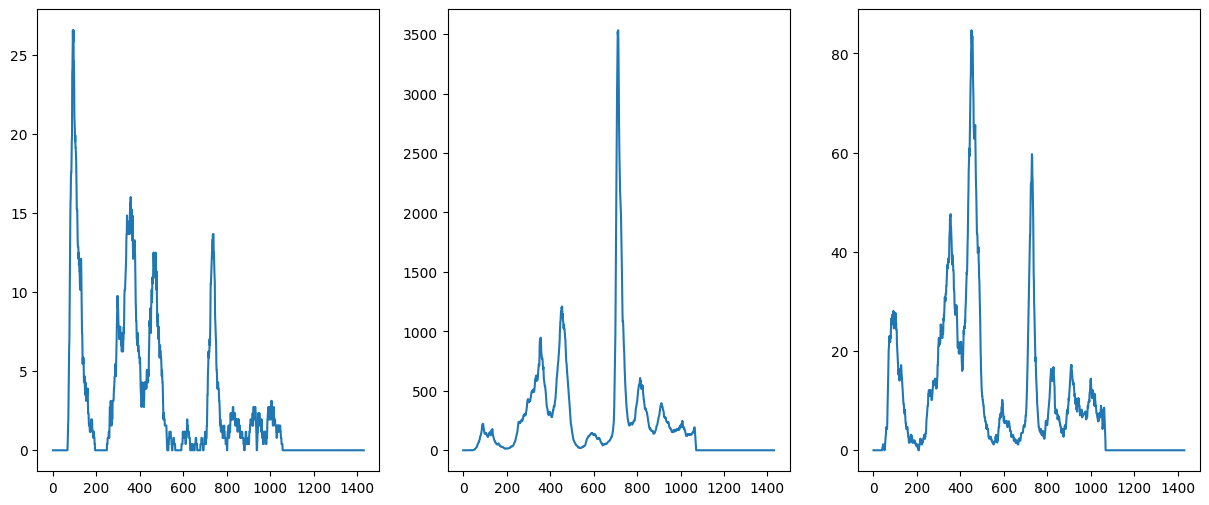

In [24]:
data = m.model_data

deaths = moving_average_compare(data.time_series_deaths)
cases = moving_average_compare(data.time_series_clinical_cases)
hospitalized = moving_average_compare(data.time_series_hospitalized)

plt.figure(figsize=(15,6))
plt.subplot()
plt.subplot(1,3,1), plt.plot(range(0, deaths.shape[0]), np.sum(deaths, axis=1))
plt.subplot(1,3,2), plt.plot(range(0, cases.shape[0]), np.sum(cases, axis=1))
plt.subplot(1,3,3), plt.plot(range(0, hospitalized.shape[0]), np.sum(hospitalized, axis=1))
plt.show()

# Run the model

C:\Users\loveb\AppData\Local\Temp\ipykernel_14192\1748110003.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


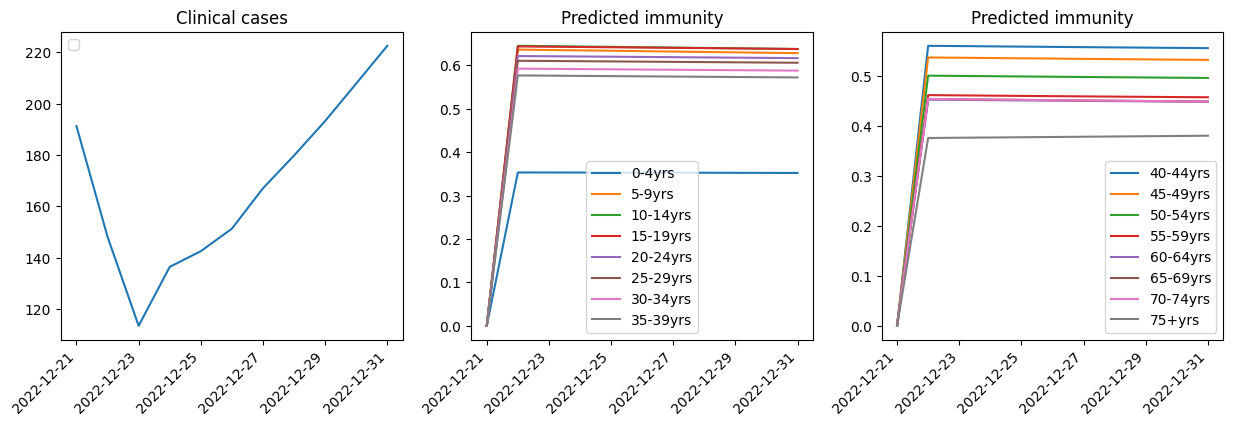

C:\Users\loveb\AppData\Local\Temp\ipykernel_14192\1748110003.py:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


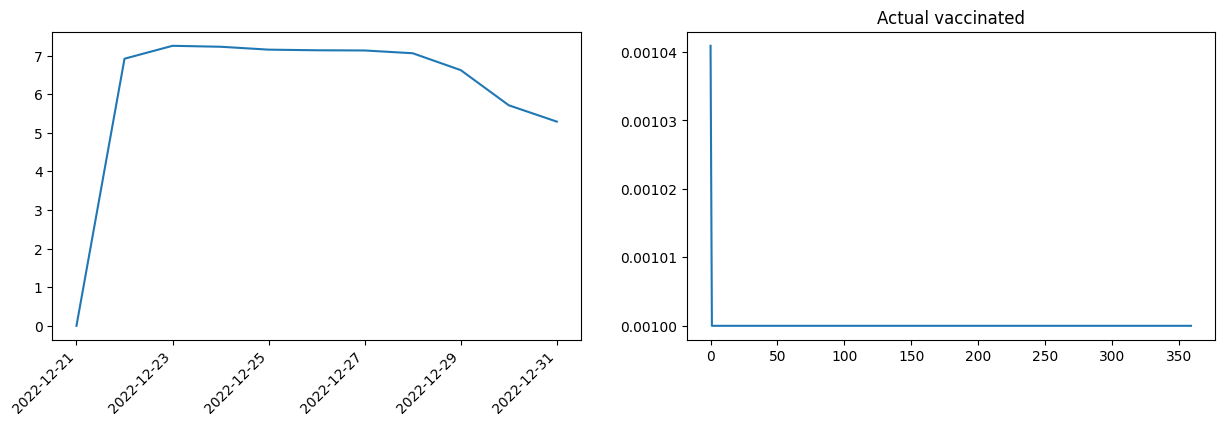

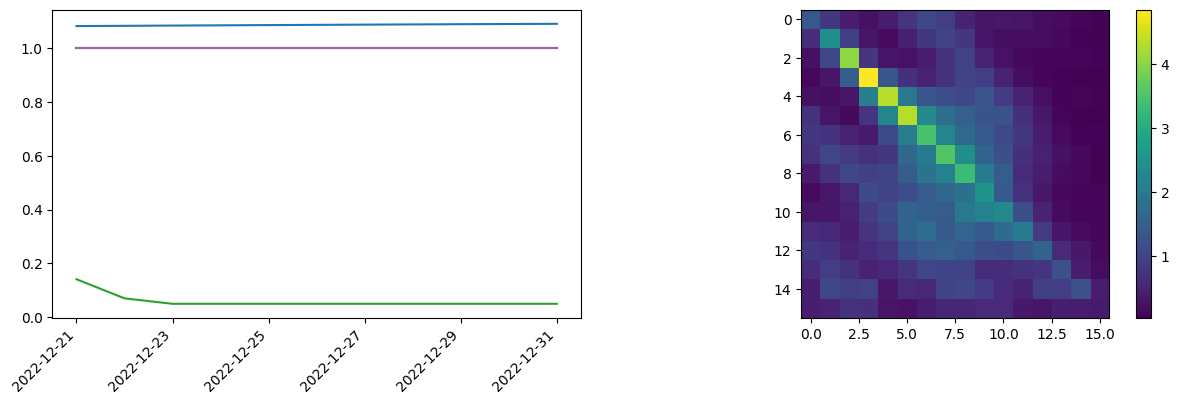

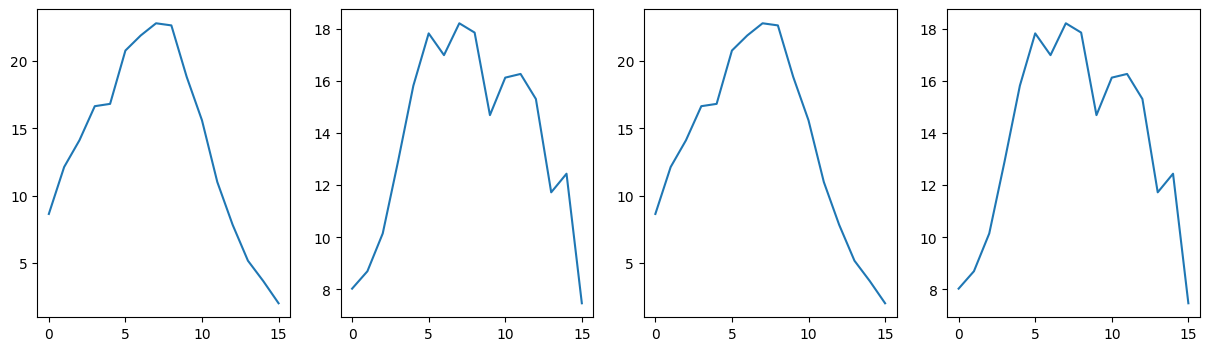

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


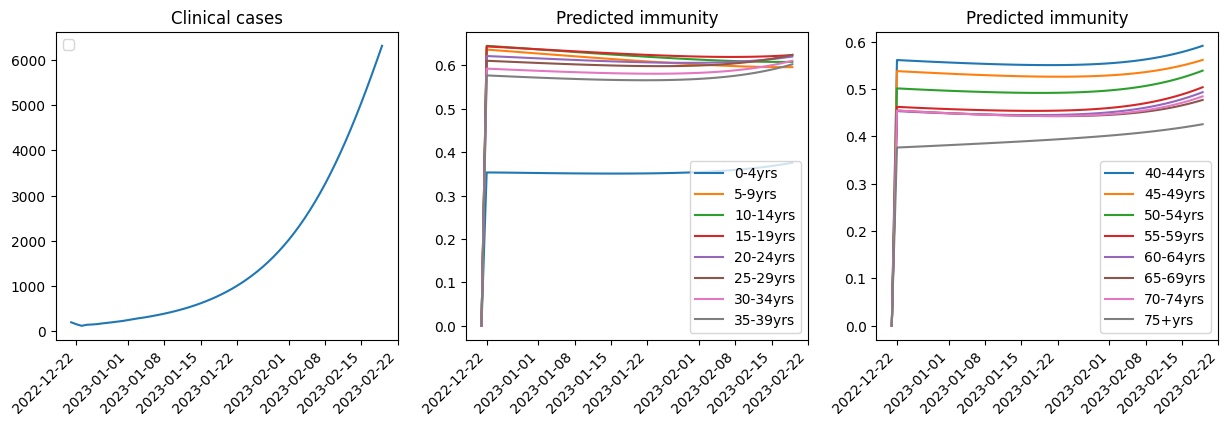

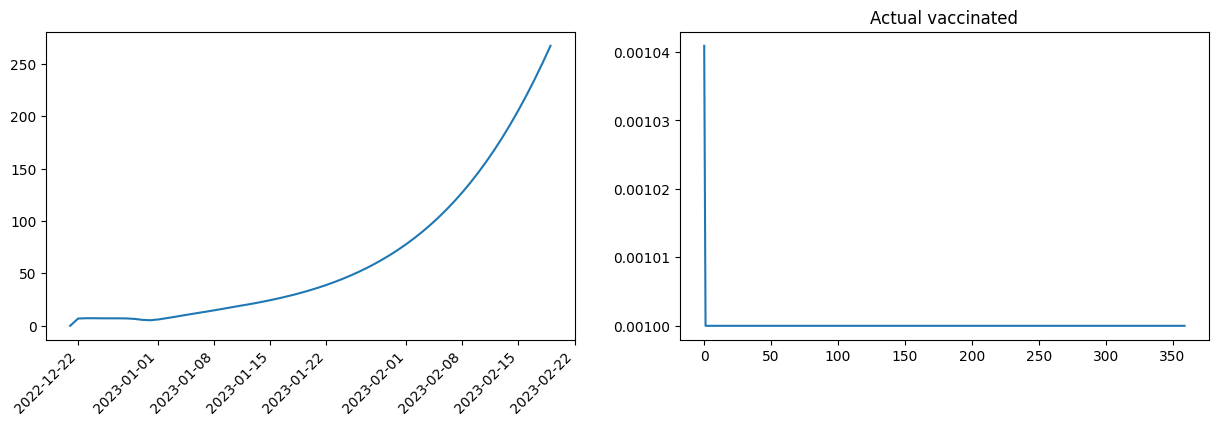

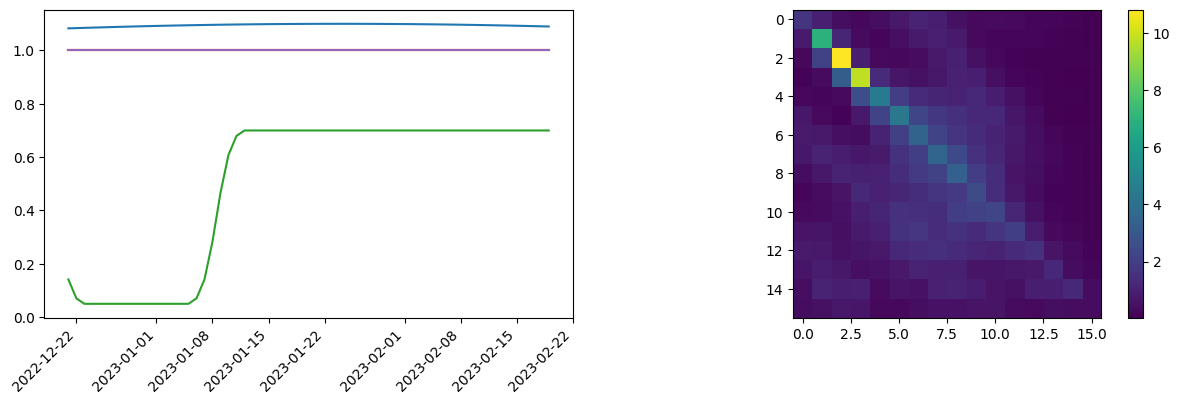

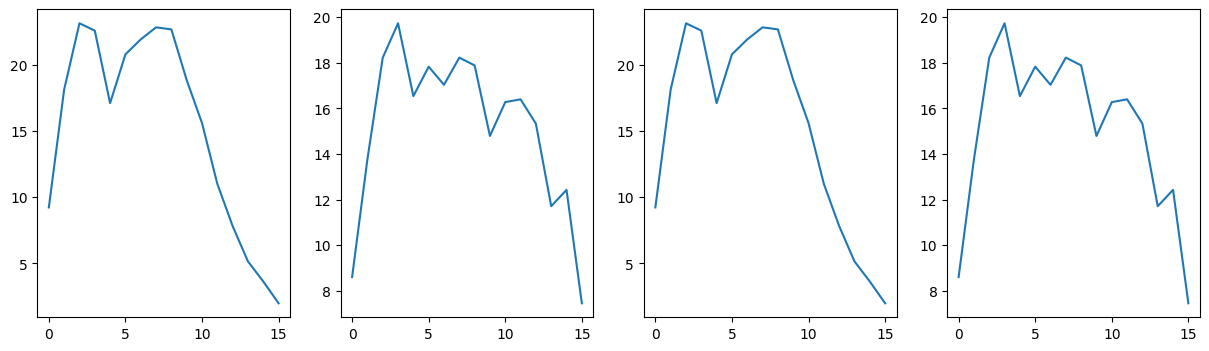

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


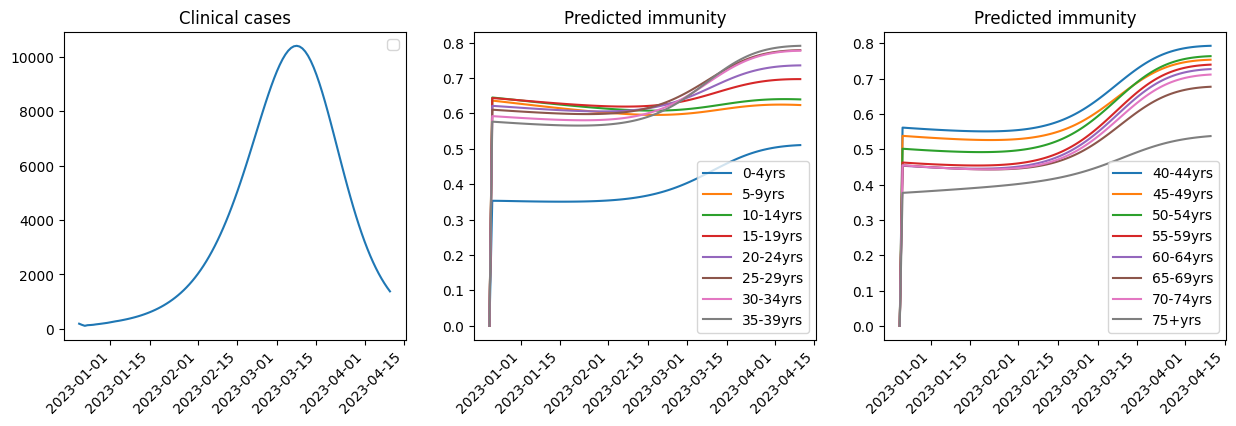

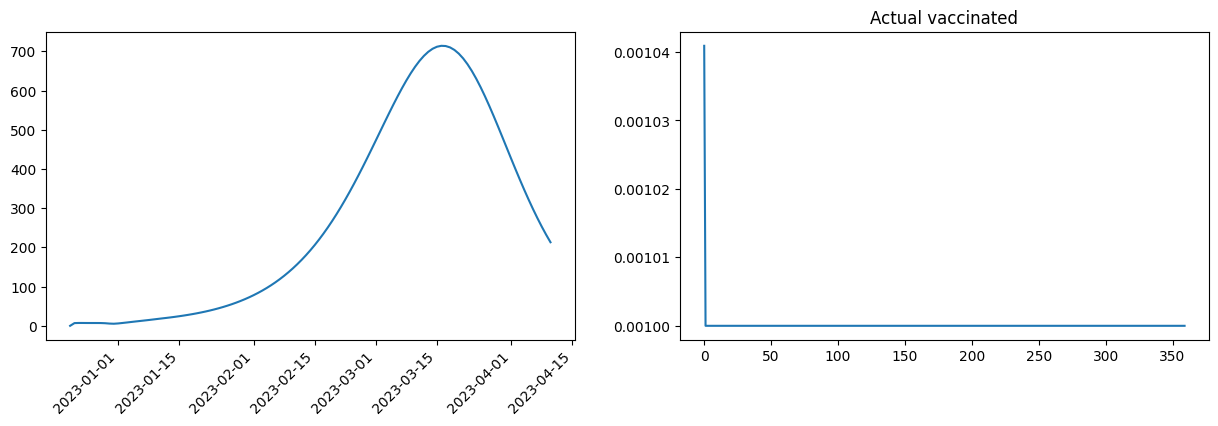

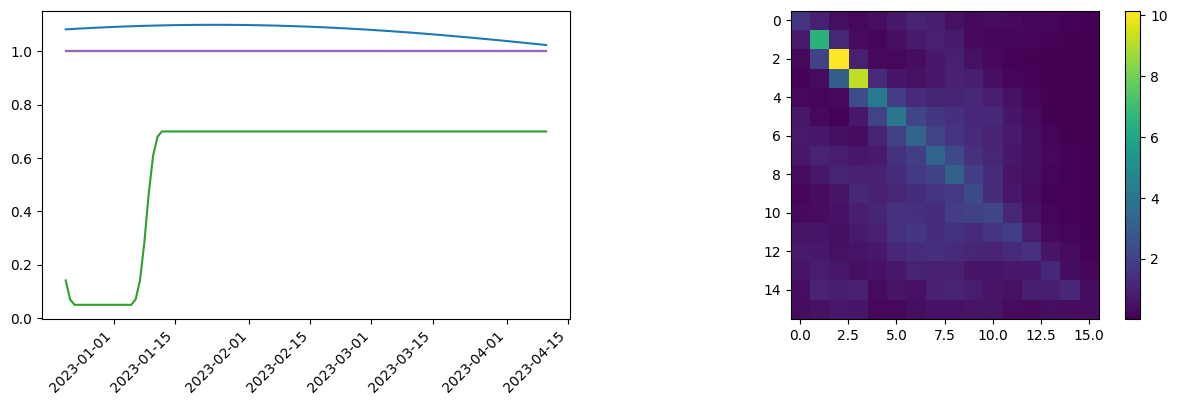

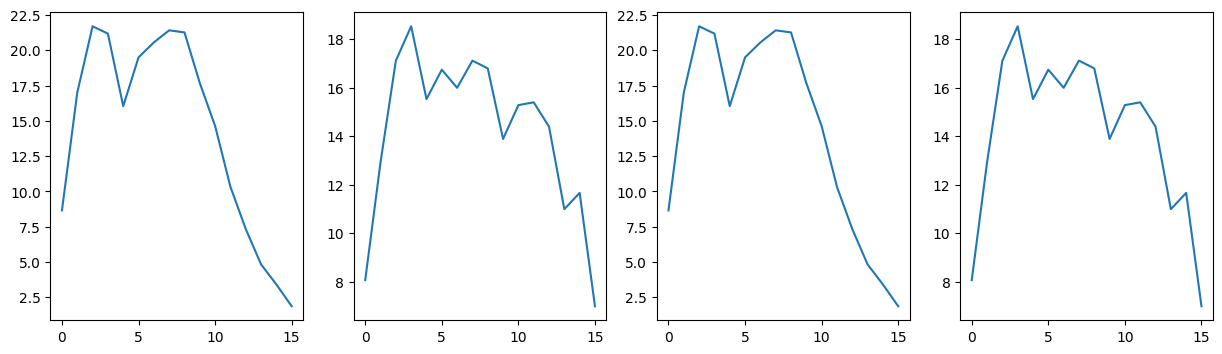

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


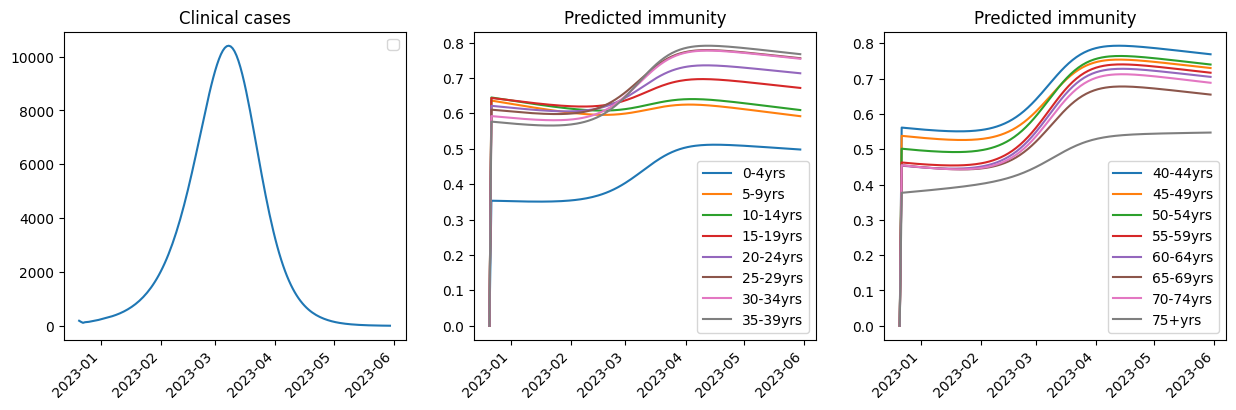

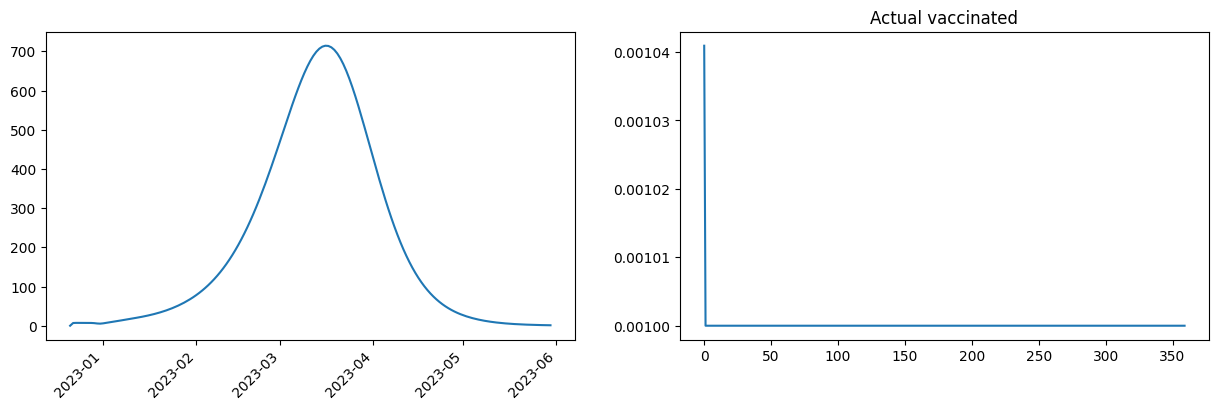

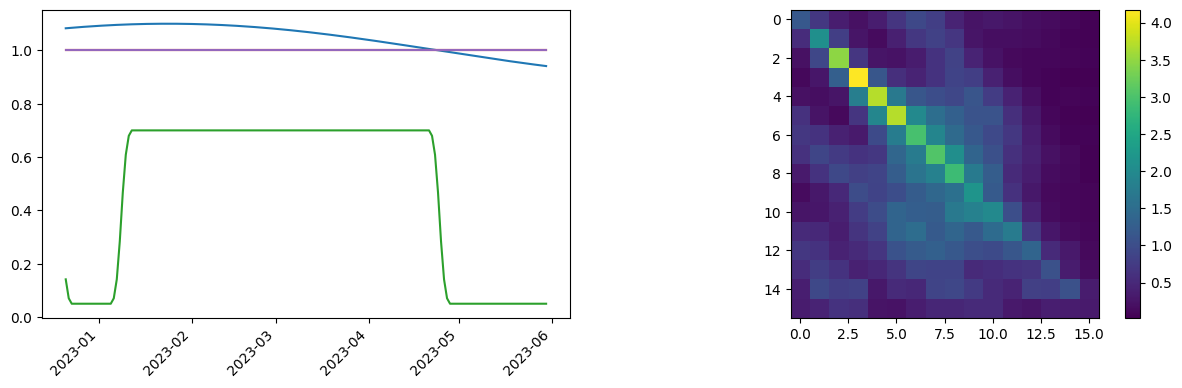

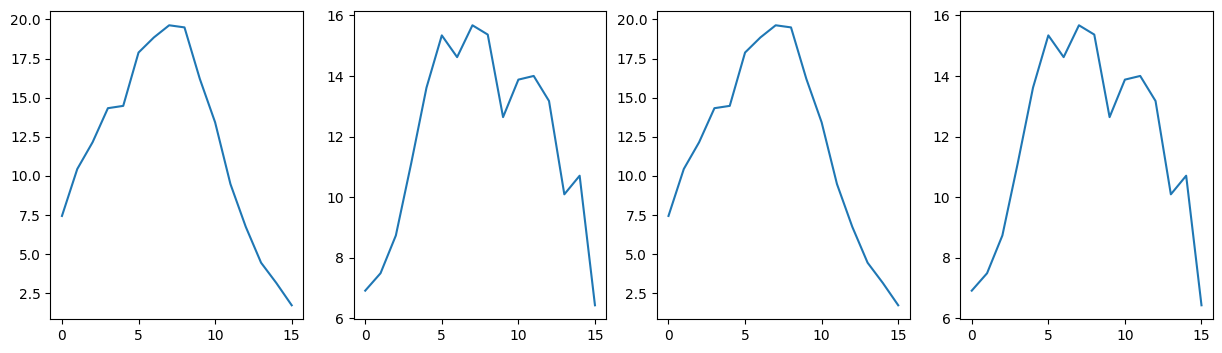

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


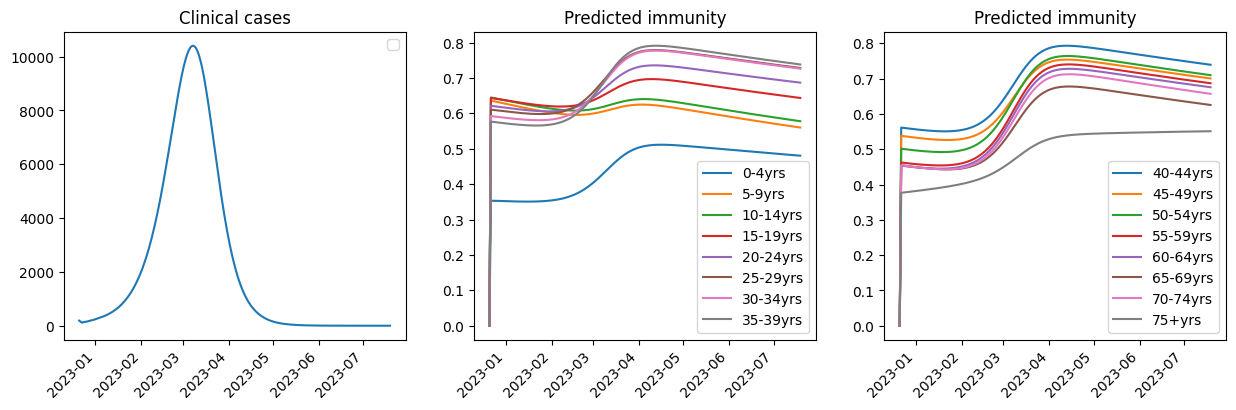

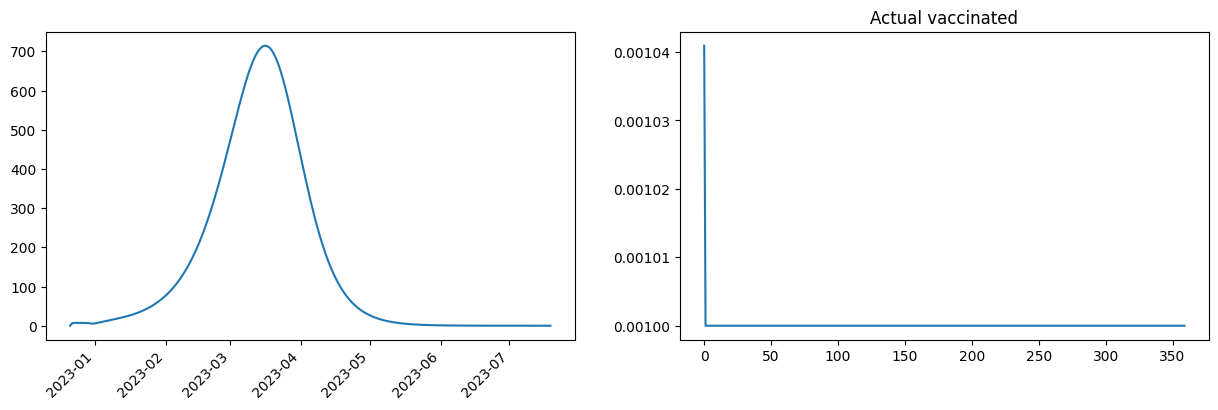

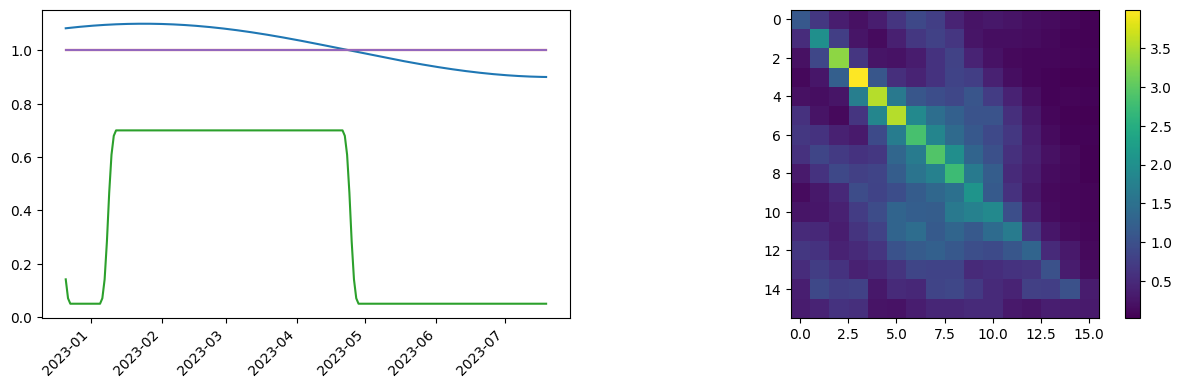

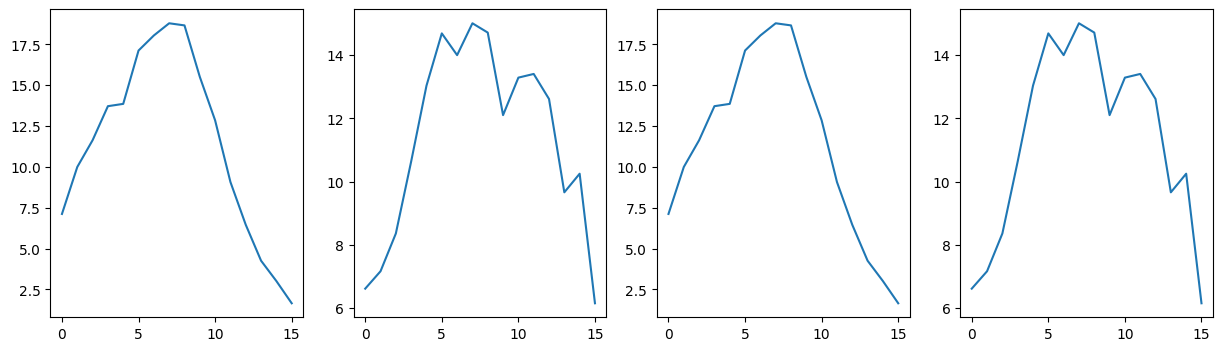

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


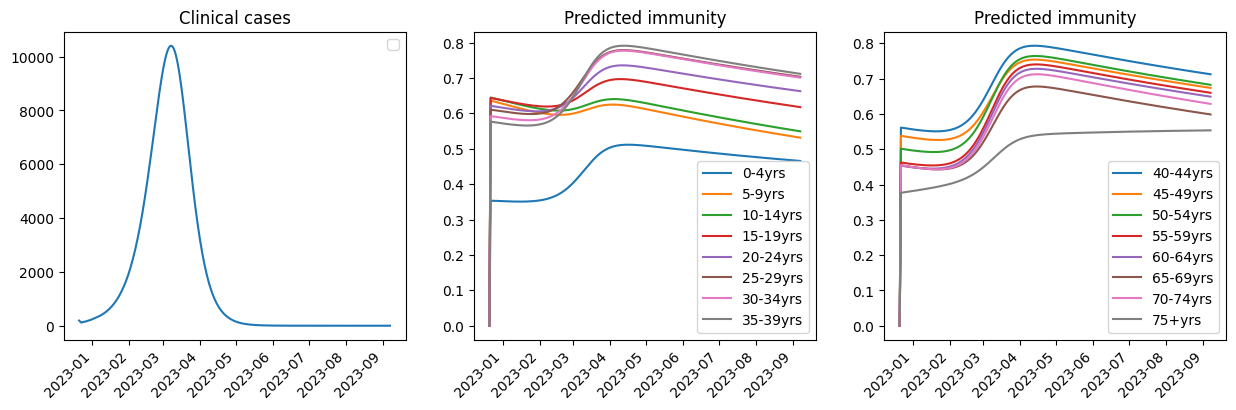

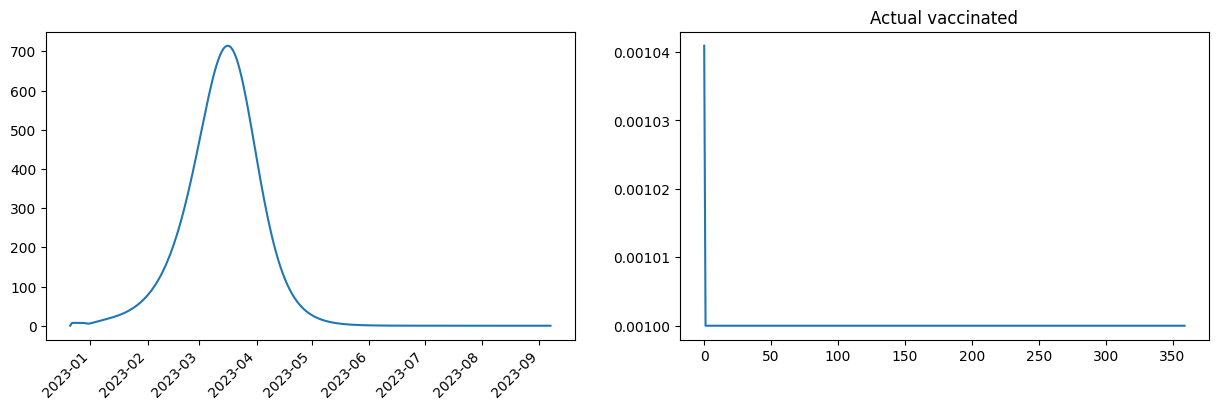

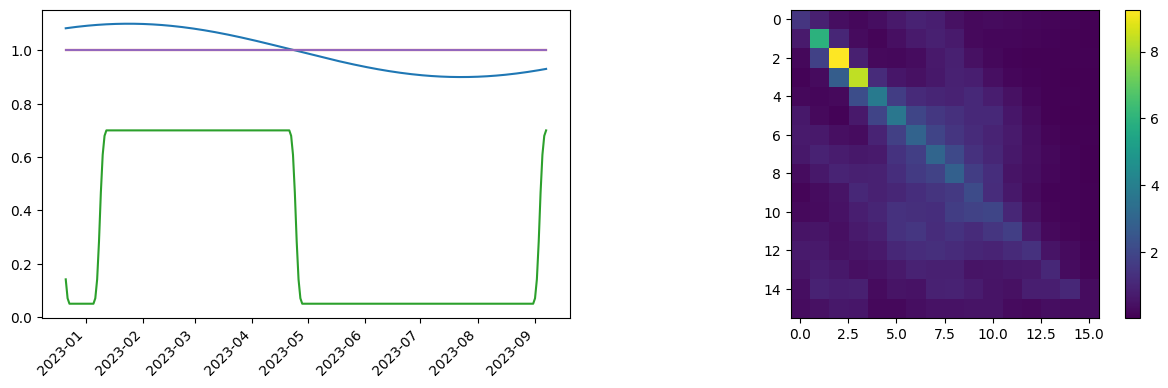

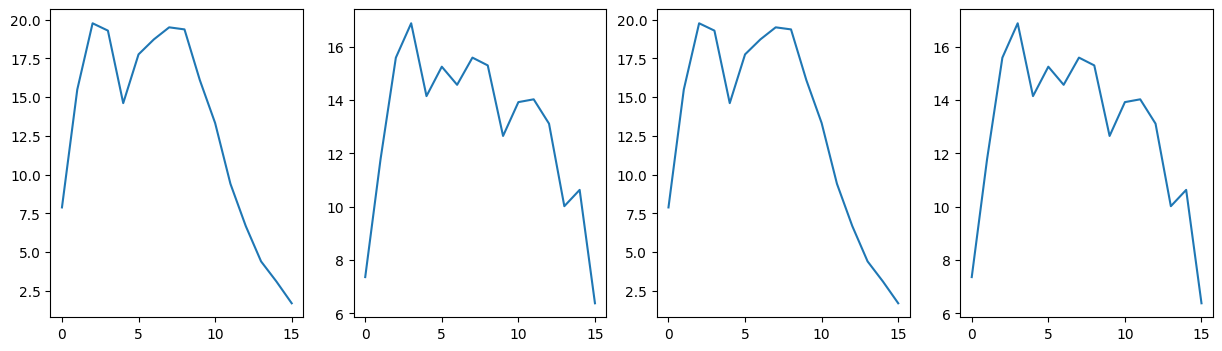

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


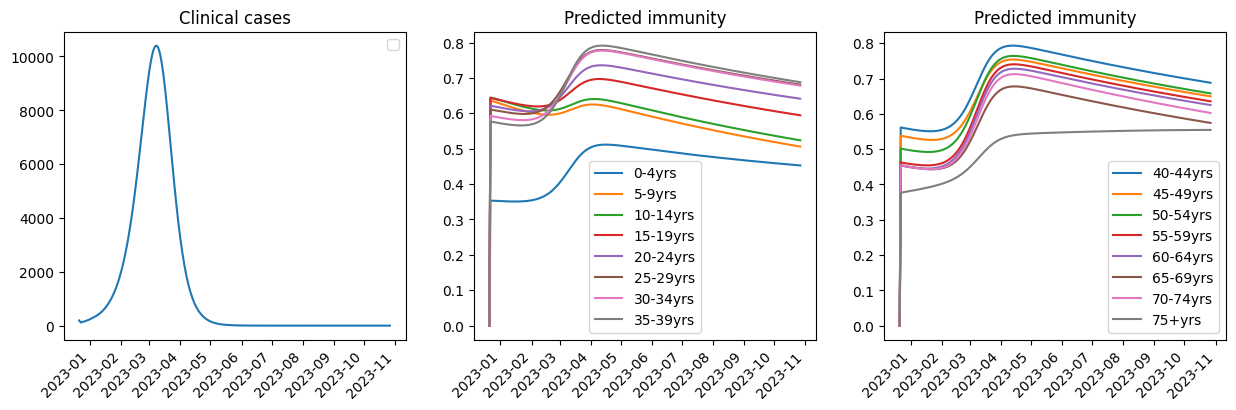

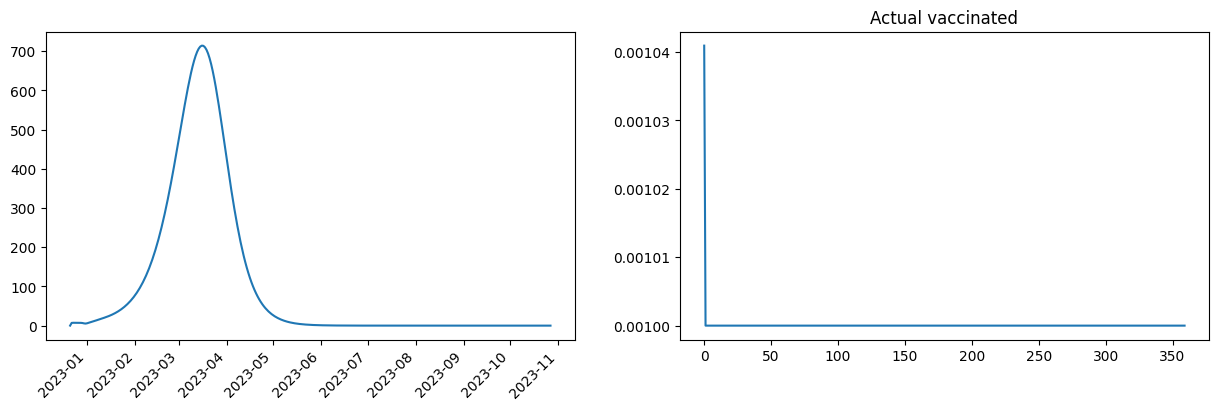

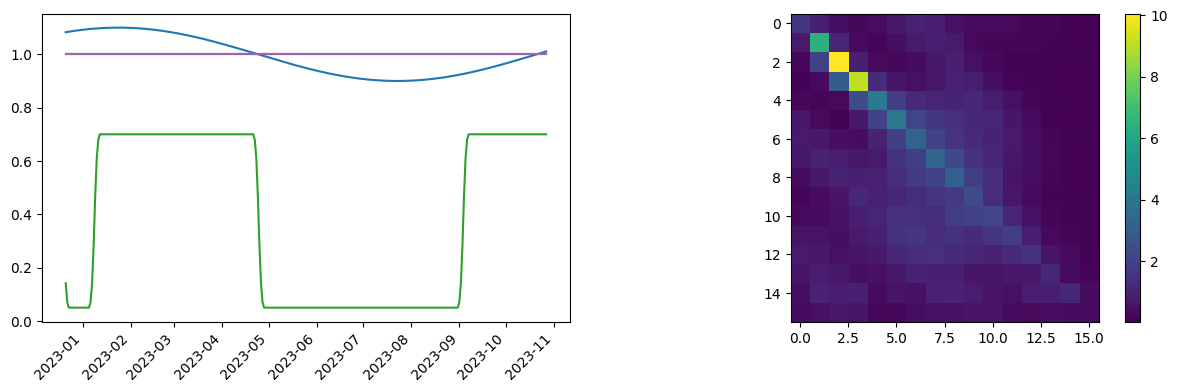

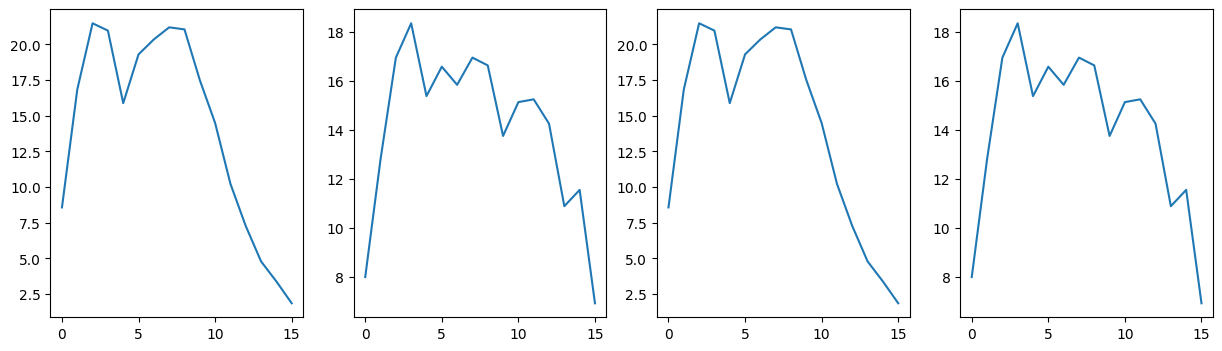

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


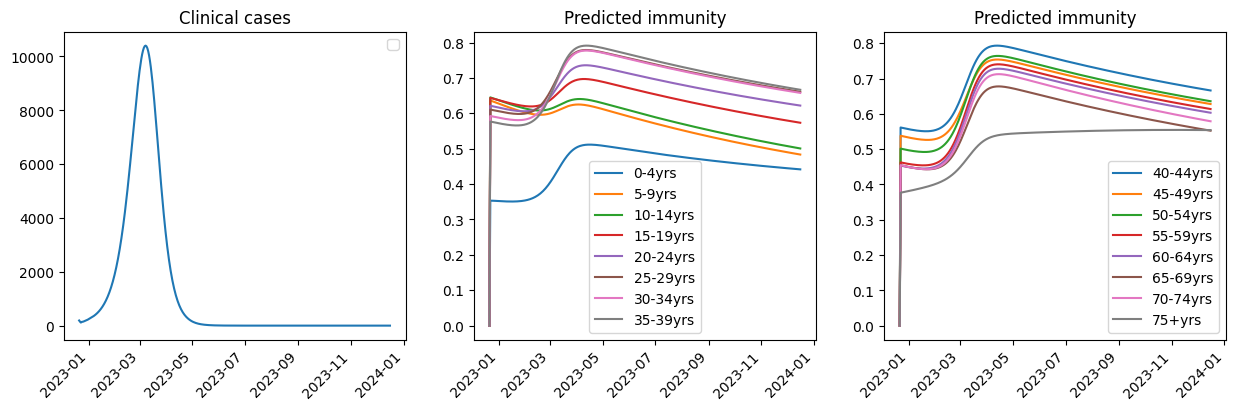

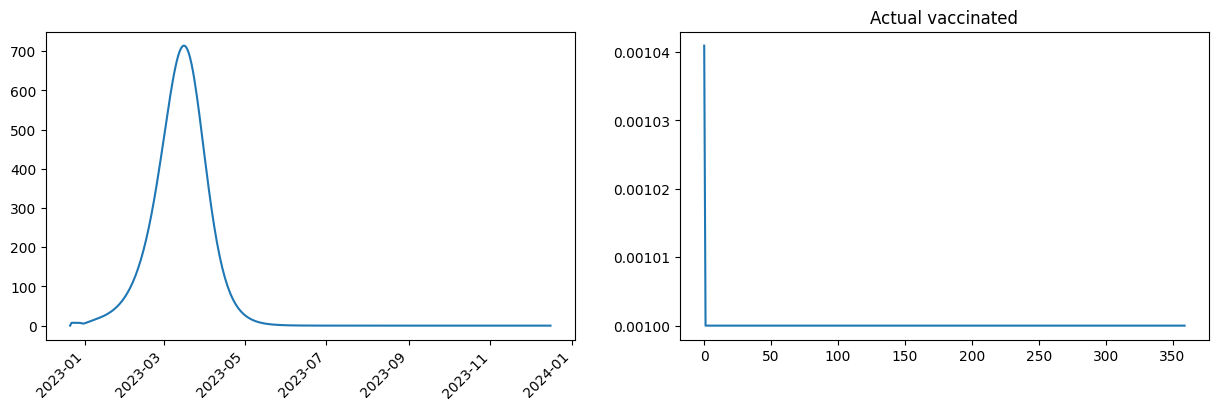

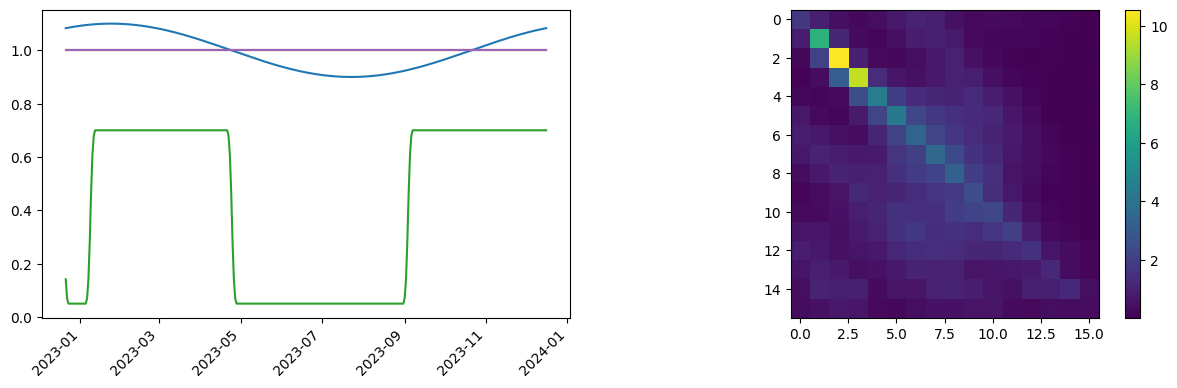

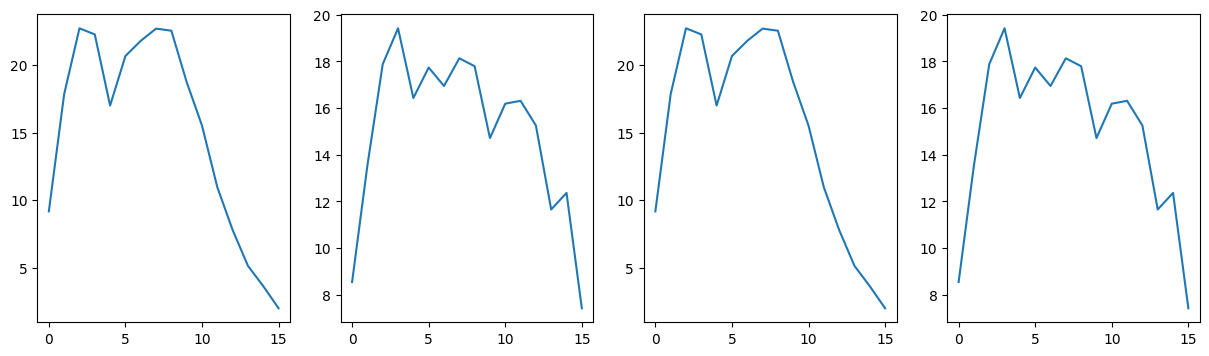

In [25]:
start_date = m.date
for i in range(forecast_days):
    month = int(i / 30)
    # multiplier = monthly_multipliers[month] * infectiousness
    # m.infectiousness = multiplier
    m.run_one_cycle(display_status=False)
    if i % 50 == 10 or m.date == 1071:

        x = [Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j+start_date) for j in range(m.date-start_date)]
        plt.figure(figsize=(15,4))
        plt.subplot()
        plt.subplot(1, 3, 1)
        plt.plot(x, np.sum((m.model_data.time_series_clinical_cases[0])[start_date:m.date], axis=1))
        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.title('Clinical cases')
        plt.subplot(1, 3, 2)
        for j in range(8):
            slice = m.model_data.time_series_immunity[0].T[j].T
            plt.plot(x, slice[start_date:m.date], label=Parameters.AGE_BANDS[j])
        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.title('Predicted immunity')
        plt.subplot(1, 3, 3)
        for j in range(8):
            slice = m.model_data.time_series_immunity[0].T[j+8].T
            plt.plot(x, slice[start_date:m.date], label=Parameters.AGE_BANDS[j+8])
        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.title('Predicted immunity')
        plt.show()

        plt.figure(figsize=(15,4))
        plt.subplot()
        plt.subplot(1, 2, 1)
        plt.plot(x, np.sum((m.model_data.time_series_hospitalized[0])[start_date:m.date], axis=1))
        plt.xticks(rotation=45, ha='right')
        plt.subplot(1, 2 ,2), plt.plot(np.mean(moving_average_compare_vaccine(m.model_data.time_series_vaccinated, 2)[start_date:], axis=1)), plt.title('vaccine 3')
        plt.title('Actual vaccinated')
        plt.show()
        plt.figure(figsize=(15,4))
        plt.subplot(1, 2, 1)
        plt.plot(x, Parameters.SEASONALITY[start_date:m.date])
        plt.plot(x, m.dependency.mobility[start_date:m.date])
        plt.xticks(rotation=45, ha='right')
        plt.subplot(1, 2, 2)
        matrix = m._synthesize_matrix(contact_type=0, contact_pattern='day') + m._synthesize_matrix(contact_type=0, contact_pattern='night')
        plt.imshow(matrix)
        plt.colorbar()
        plt.show()
        plt.figure(figsize=(15,4))
        plt.subplot(1, 4, 1), plt.plot(np.matmul(matrix.T, np.ones(shape=(16, 1))))
        plt.subplot(1, 4, 2), plt.plot(np.matmul(matrix, np.ones(shape=(16, 1))))
        plt.subplot(1, 4, 3), plt.plot(np.sum(matrix, axis=0))
        plt.subplot(1, 4, 4), plt.plot(np.sum(matrix, axis=1))
        plt.show()

## Display post-forecast data

C:\Users\loveb\AppData\Local\Temp\ipykernel_14192\3856494676.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1), plt.plot(range(0, deaths.shape[0]), np.sum(deaths, axis=1)), plt.title('Number of deaths')


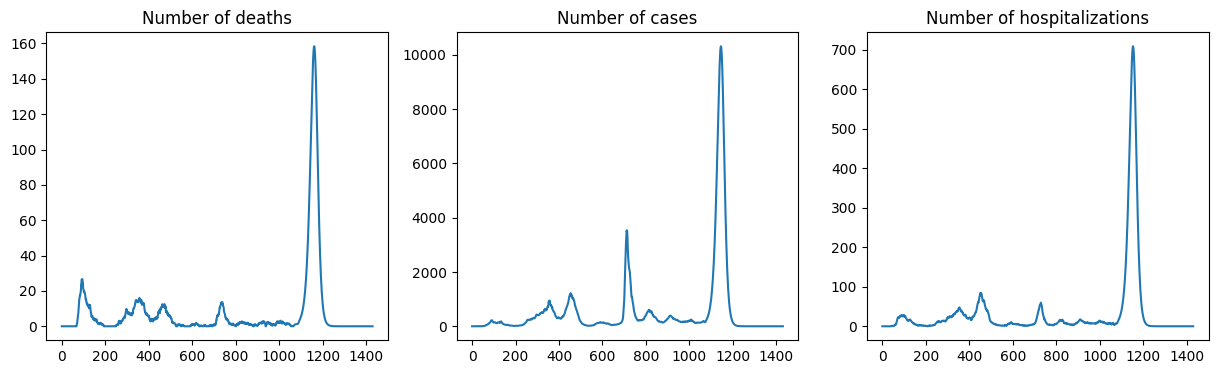

In [26]:
deaths = moving_average_compare(data.time_series_deaths)
cases = moving_average_compare(data.time_series_clinical_cases)
hospitalized = moving_average_compare(data.time_series_hospitalized)

plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1,3,1), plt.plot(range(0, deaths.shape[0]), np.sum(deaths, axis=1)), plt.title('Number of deaths')
plt.subplot(1,3,2), plt.plot(range(0, cases.shape[0]), np.sum(cases, axis=1)), plt.title('Number of cases')
plt.subplot(1,3,3), plt.plot(range(0, hospitalized.shape[0]), np.sum(hospitalized, axis=1)), plt.title('Number of hospitalizations')
plt.show()

C:\Users\loveb\AppData\Local\Temp\ipykernel_14192\2726694870.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1), plt.plot(range(0, vaccinated.shape[0]), np.sum(vaccinated, axis=1)), plt.title('Percentage of vaccinated individuals')


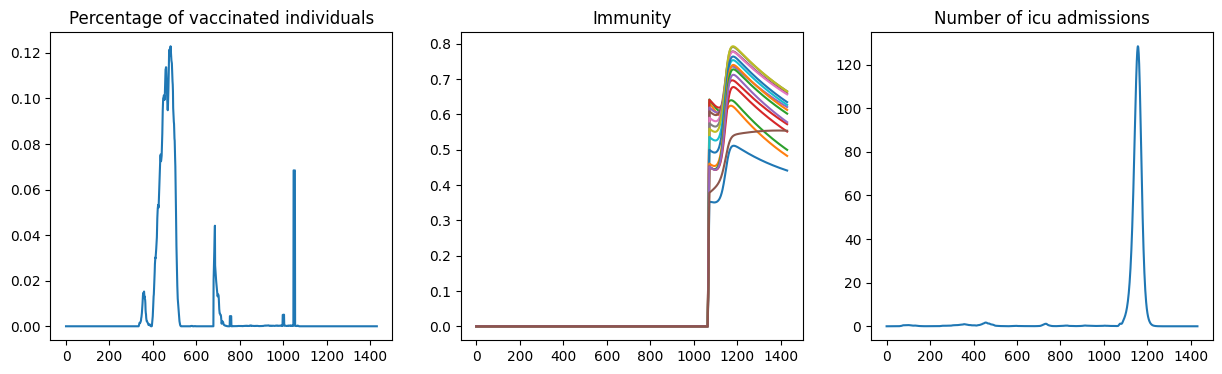

In [27]:
vaccinated = moving_average_compare(data.time_series_vaccinated)
immunity = moving_average_compare(data.time_series_immunity)
icu = moving_average_compare(data.time_series_ICU)

plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1,3,1), plt.plot(range(0, vaccinated.shape[0]), np.sum(vaccinated, axis=1)), plt.title('Percentage of vaccinated individuals')
plt.subplot(1,3,2), plt.plot(range(0, immunity.shape[0]), immunity), plt.title('Immunity')
plt.subplot(1,3,3), plt.plot(range(0, icu.shape[0]), np.sum(icu, axis=1)), plt.title('Number of icu admissions')
plt.show()

## Save the data to local files.

In [28]:
save = False
if save:
    m.save_to_file()
print('Done!')

Done!
